In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import glob
import os
import math
from os import listdir
import data_visualization as dv
import dill
import scipy 
from scipy.stats import norm
from scipy import stats
from tqdm import tqdm 
import random
import sys
import importlib

In [15]:
sys.path.insert(0,r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Agent_Shutoff_Go_Exp\Scripts\Analysis_and_Statistics')
sys.path.insert(0,r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement')
import plot_functions 
import Agent_Shutoff_Go_Subject_Object
importlib.reload(Agent_Shutoff_Go_Subject_Object)
importlib.reload(plot_functions)
import plot_functions as pf

## Initial Thangs

In [16]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

# Initial thangs
os.chdir('D:\\Subject_Data\\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
SAVE_PATH = r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\\Agent_Shutoff_Go_Exp\\Figures\\Group_Figures'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
figures_pull_list = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)
task_name = 'Seth_MatchPennies_Agent_Exp1'
num_subjects

20

In [17]:

trial_block_titles = ['React (Switch)','React (Only React)','Gamble (Switch)','Gamble (Only Gamble)']

## Pickle Objects

In [18]:
load_path = r'D:\Subject_Data\Agent_Shutoff_Go\Subjects_Analyzed\\'
subject = dill.load((open(load_path + f'subject_object_dict.pkl', 'rb')))
group = dill.load((open(load_path + f'group_object.pkl', 'rb')))
group.analyze_data()

## Set Save to True or False

In [19]:
save = True

# Individual Histograms

In [37]:
a = ['a;lkj','asdf']
for i in a:
    print(i)

a;lkj
asdf


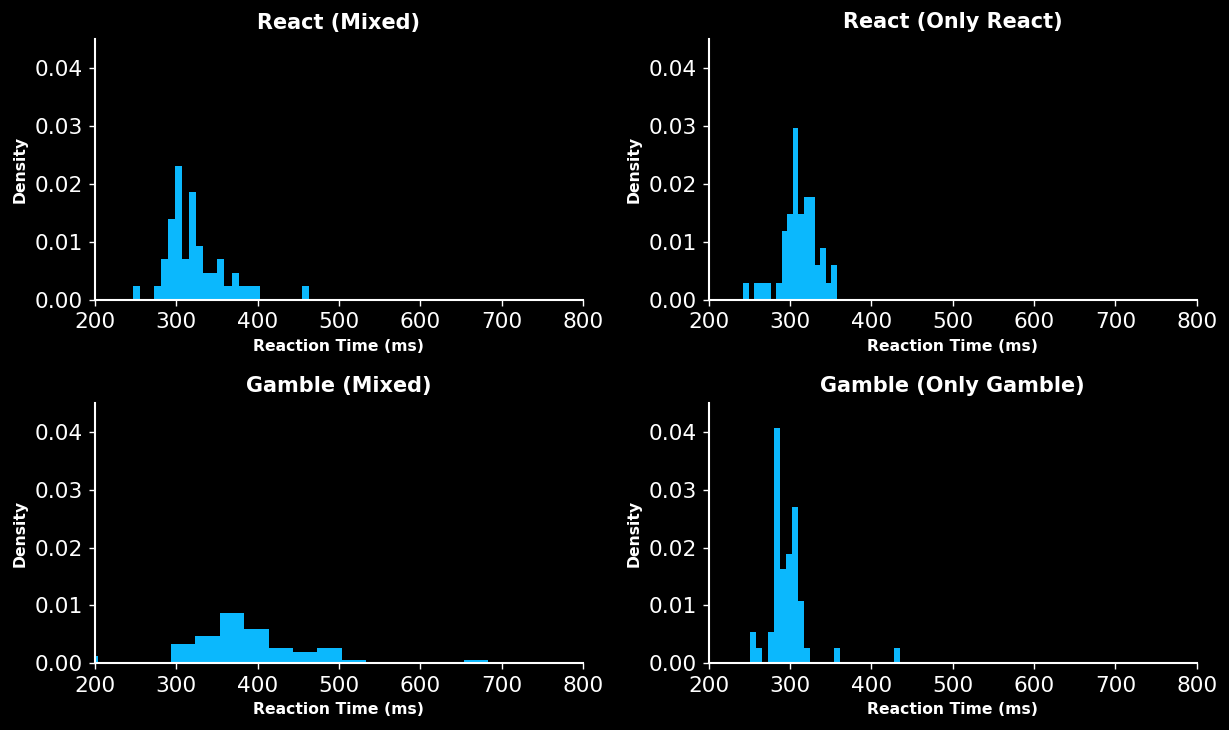

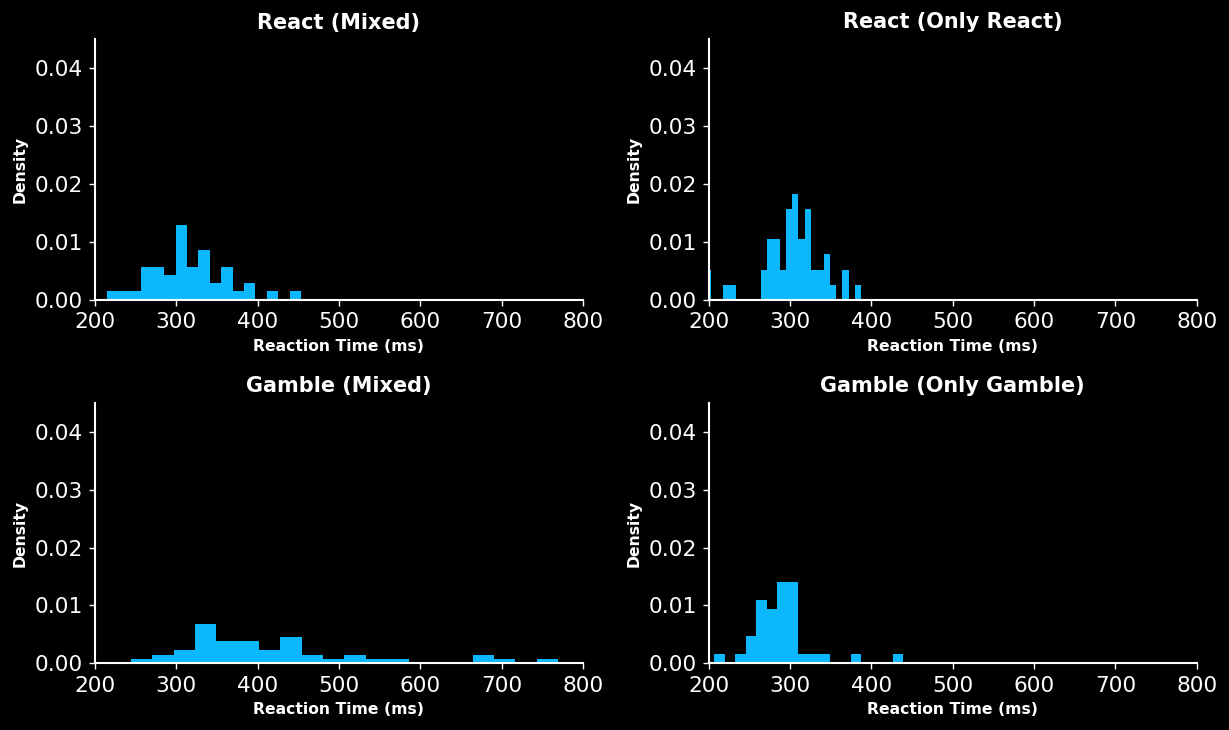

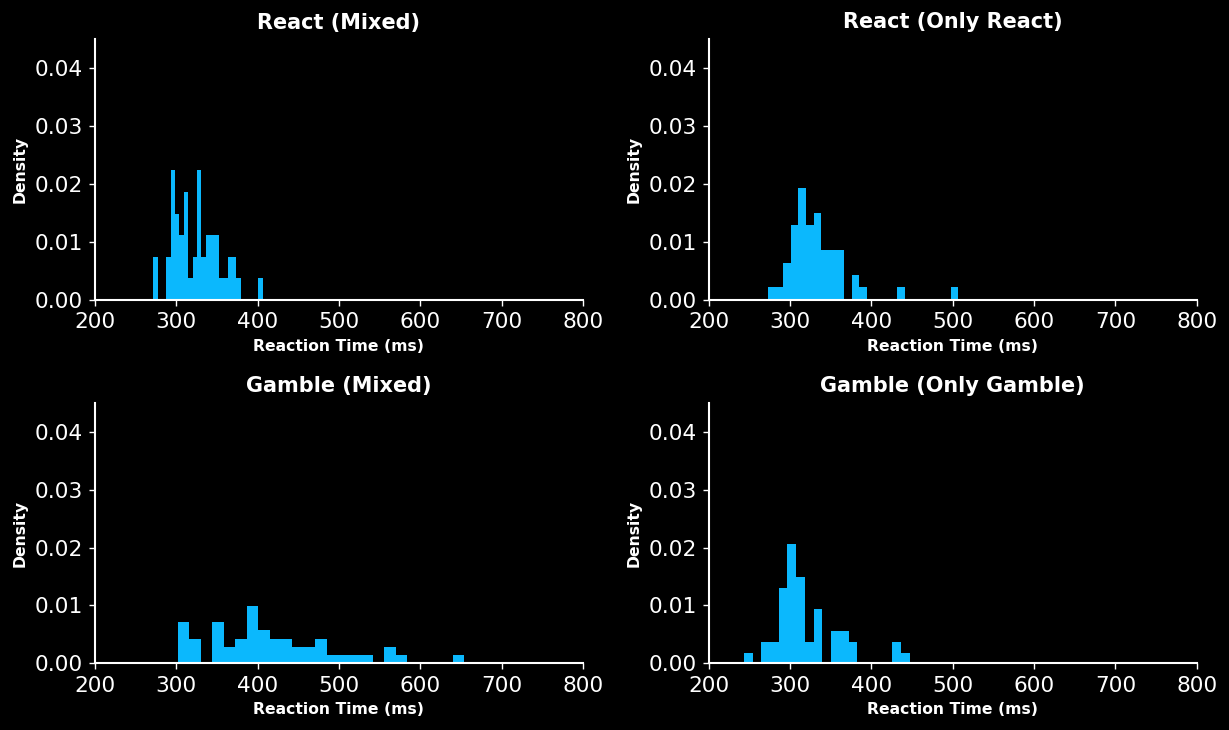

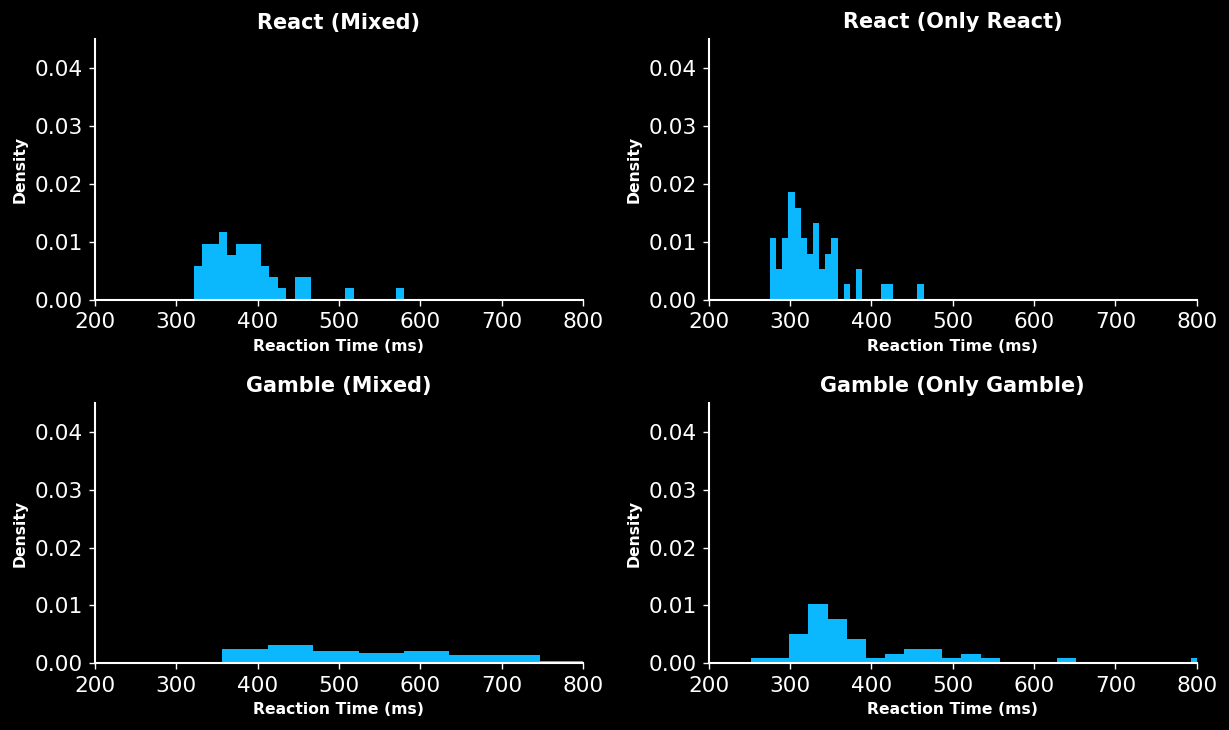

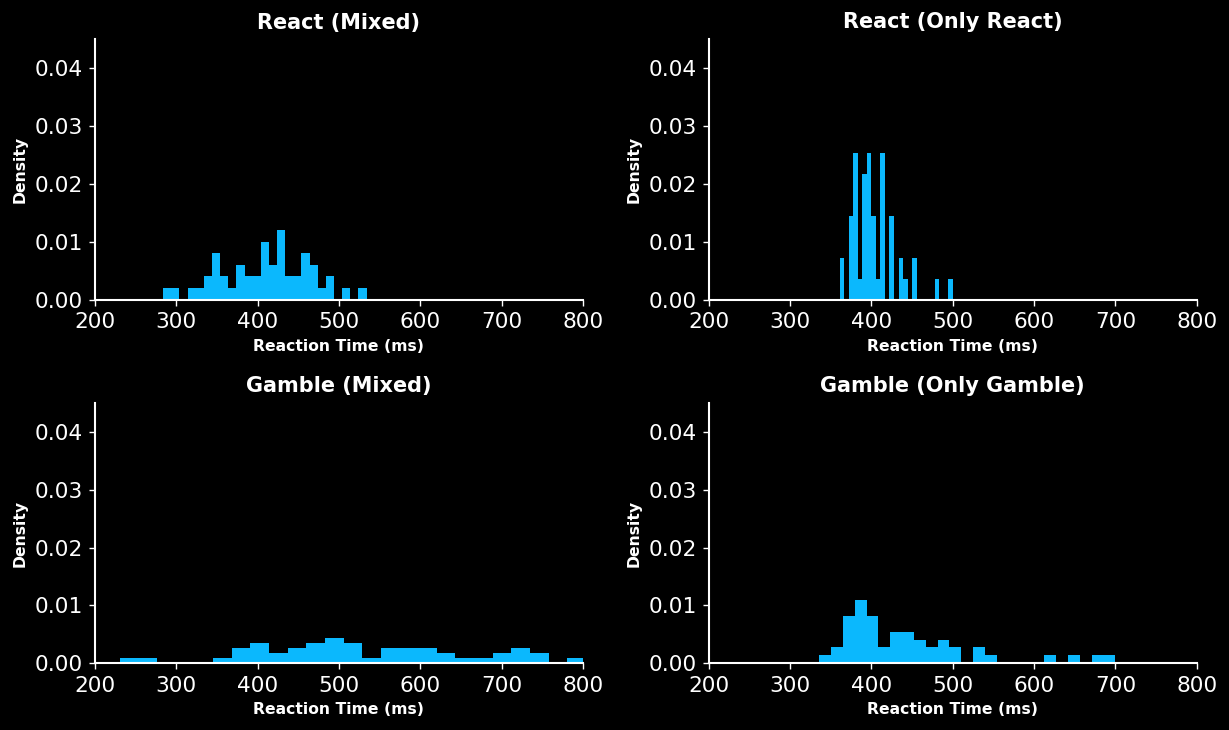

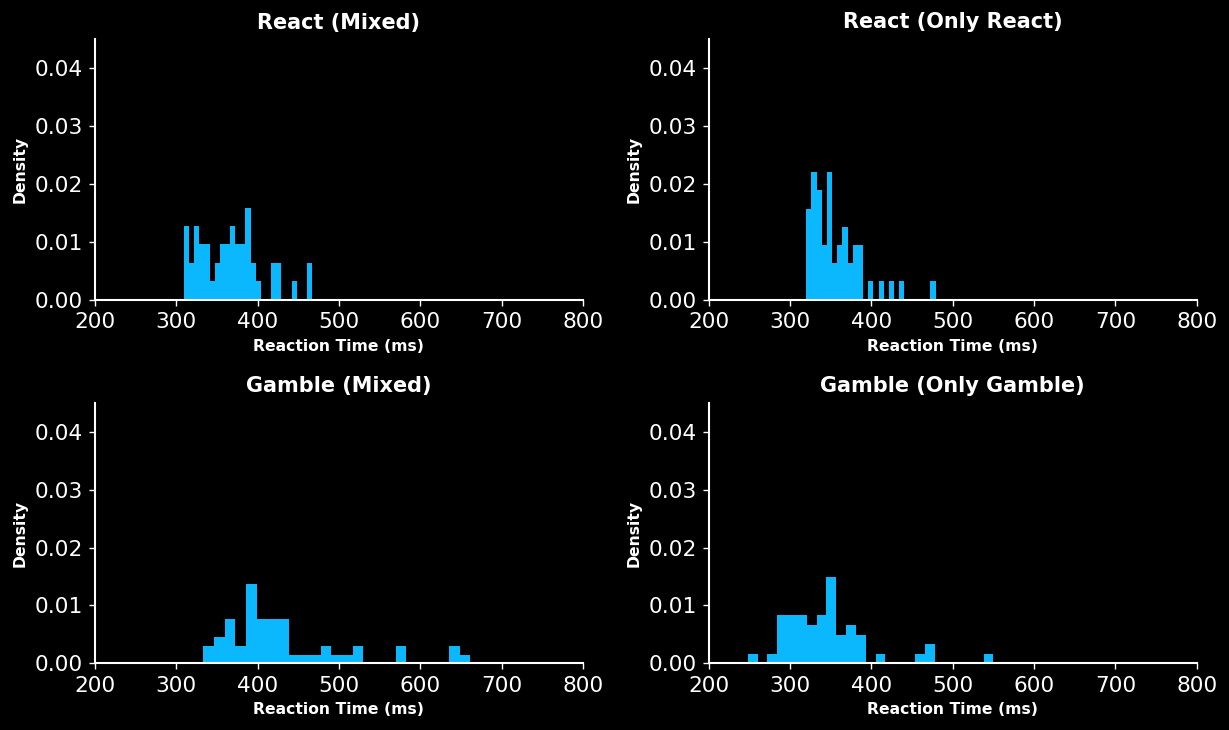

In [50]:
xlabs = ['React (Mixed)','React (Only React)','Gamble (Mixed)','Gamble (Only Gamble)']
for subname in subject.keys():
    fig,axs = plt.subplots(2,2,figsize = (10,6))
    axs[0,0].hist(subject[subname].react_reaction_time_mixed,bins=25,density=True)
    axs[0,1].hist(subject[subname].react_reaction_time_only_react,bins=25,density=True)
    axs[1,0].hist(subject[subname].gamble_reaction_time_mixed,bins=25,density=True)
    axs[1,1].hist(subject[subname].gamble_reaction_time_only_gamble,bins=25,density=True)
    for ax,lab in zip(axs.flatten(),xlabs):
        ax.set_xlabel('Reaction Time (ms)',fontsize=9)
        ax.set_ylabel('Density',fontsize=9)
        ax.set_title(lab,fontsize=12)
        ax.set_xlim(200,800)
        ax.set_ylim(0,0.045)
    fig.tight_layout()

# Individual Boxplots

Reaction Times

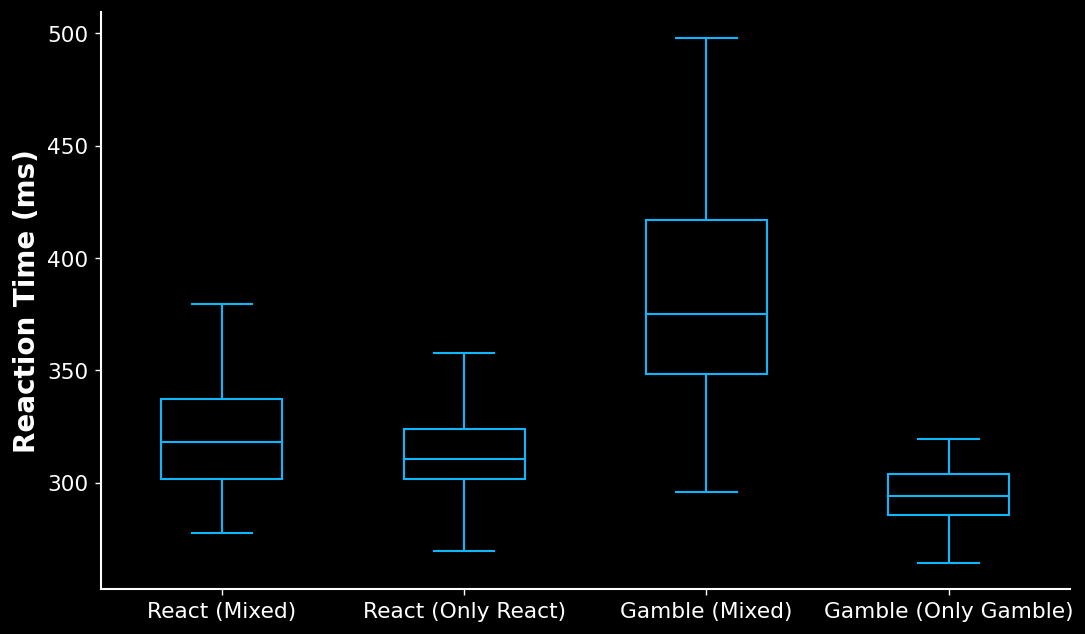

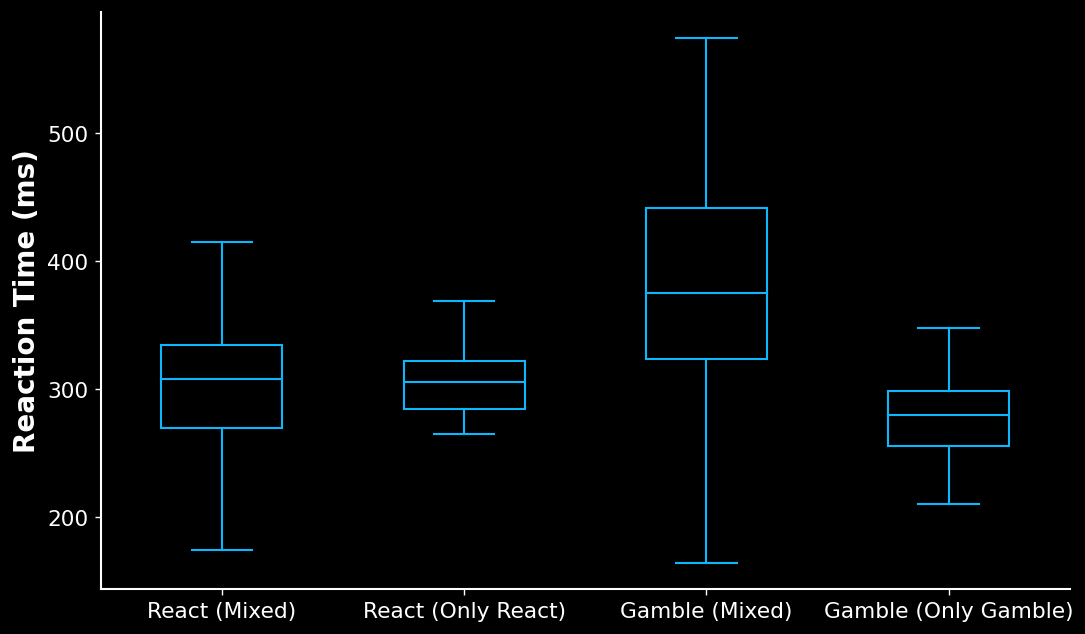

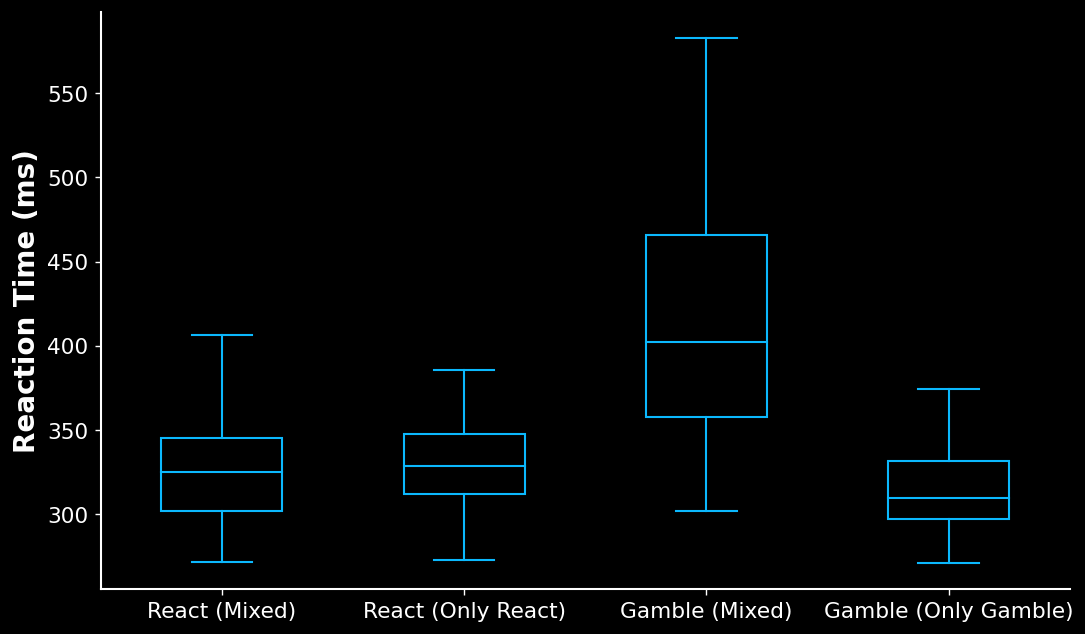

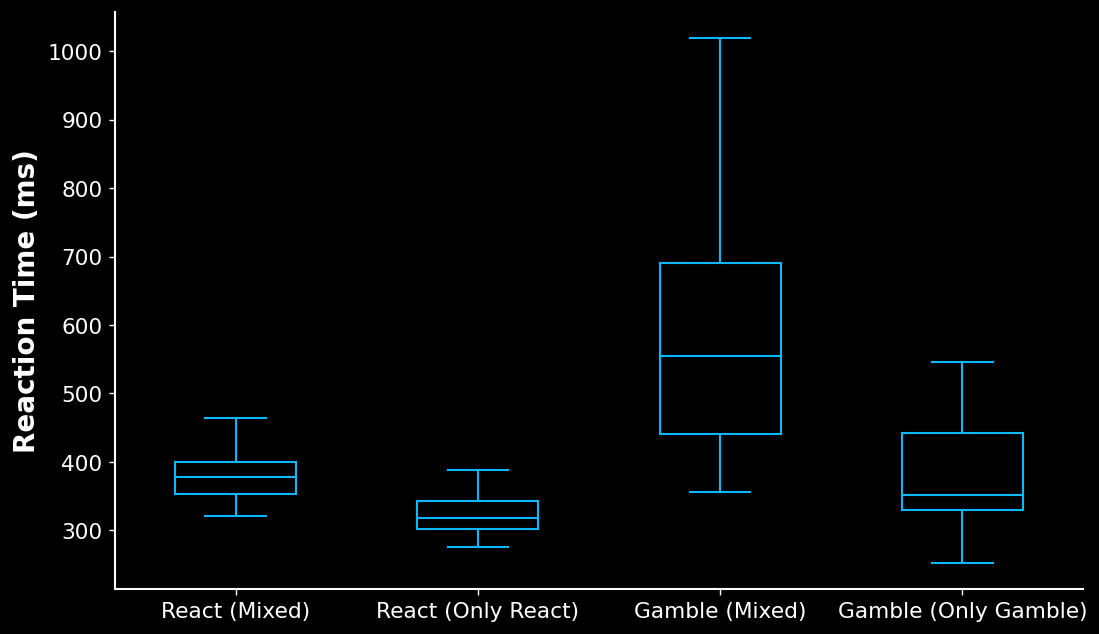

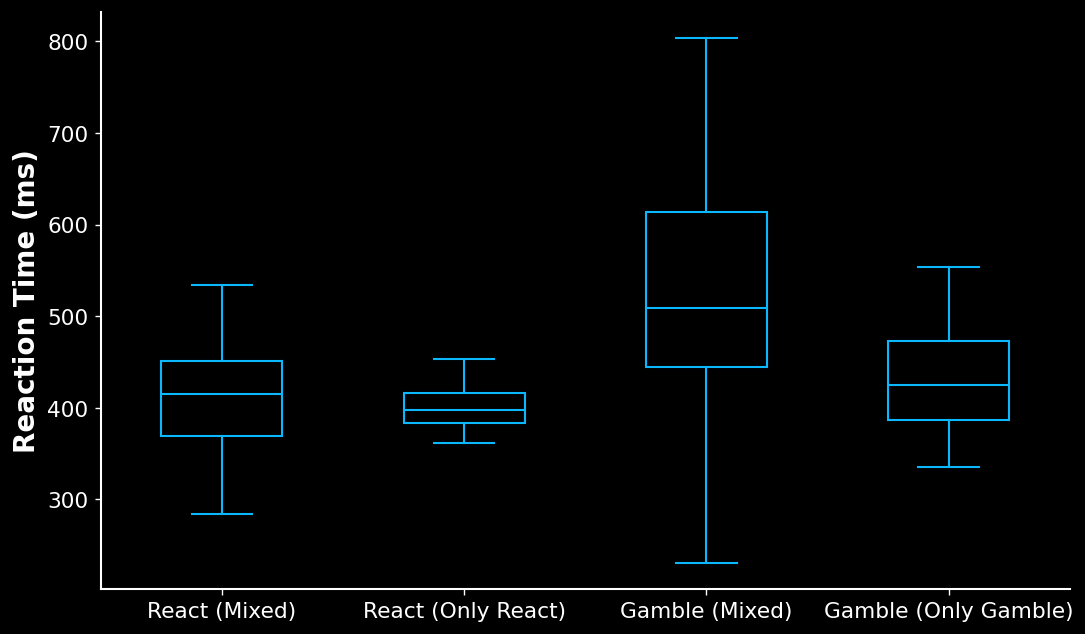

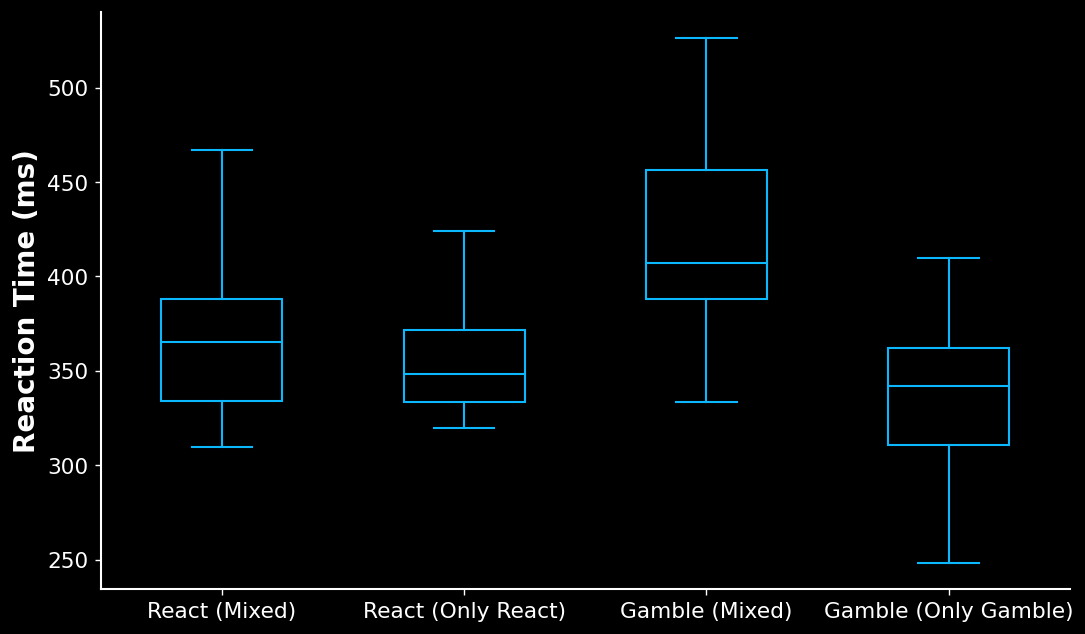

In [20]:
for subname in subject.keys():
    fig,ax = plt.subplots(figsize = (10,6))
    dv.boxplot(subject[subname].react_reaction_time_mixed,x_pos = 0,ax=ax)
    dv.boxplot(subject[subname].react_reaction_time_only_react,x_pos = 1,ax=ax)
    dv.boxplot(subject[subname].gamble_reaction_time_mixed,x_pos = 2,ax=ax)
    dv.boxplot(subject[subname].gamble_reaction_time_only_gamble,x_pos = 3,ax=ax)
    xlabs = ['React (Mixed)','React (Only React)','Gamble (Mixed)','Gamble (Only Gamble)']
    ax.set_xticklabels(xlabs)
    ax.set_ylabel('Reaction Time (ms)')

Compare Repeat Trials to Switch Trials 

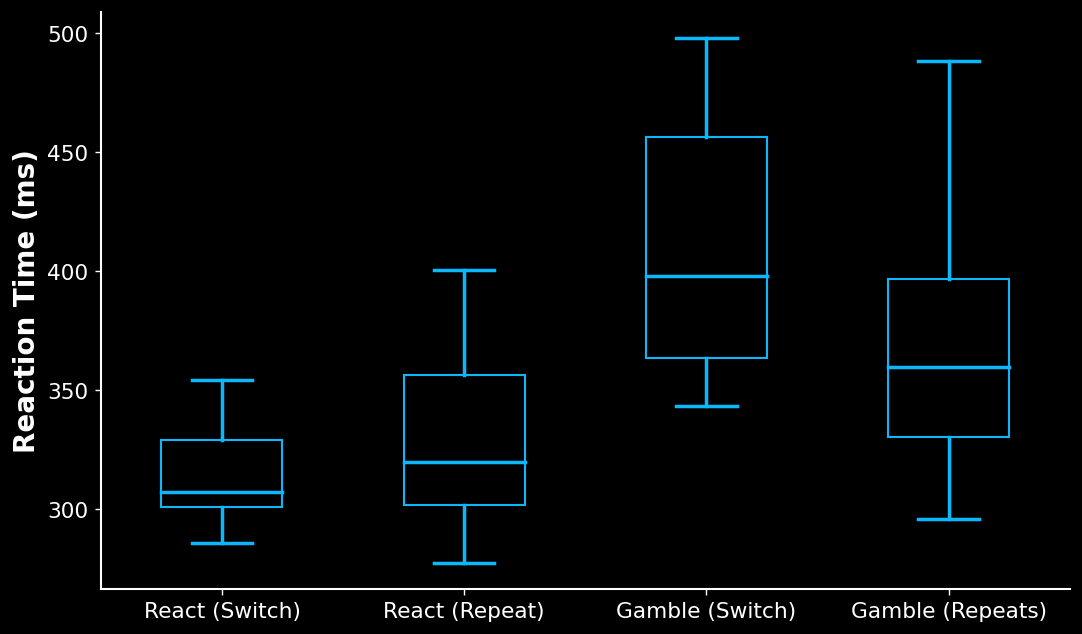

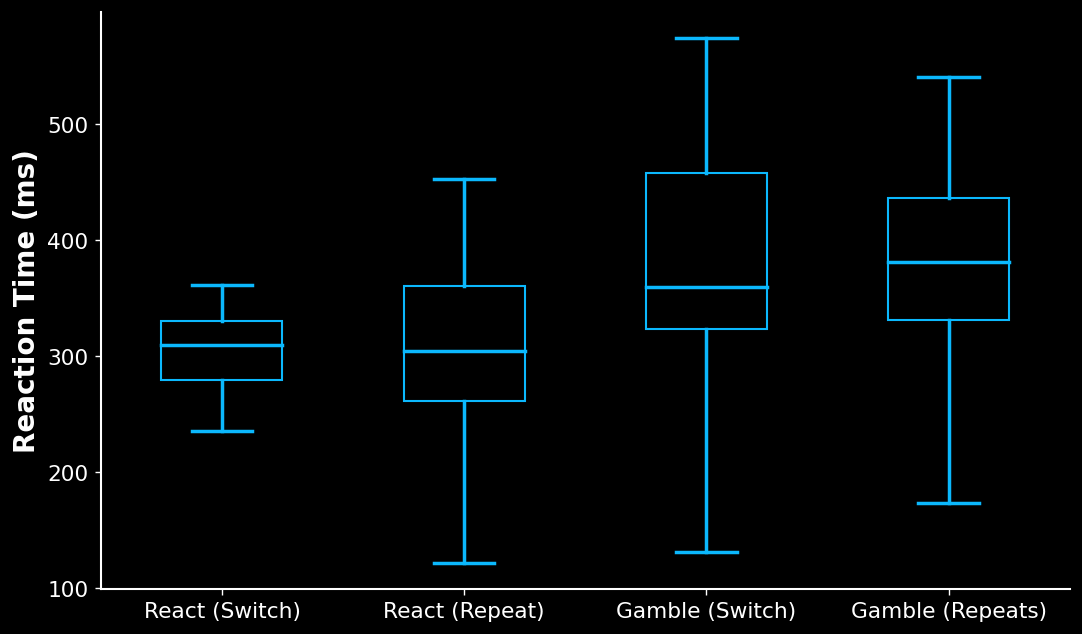

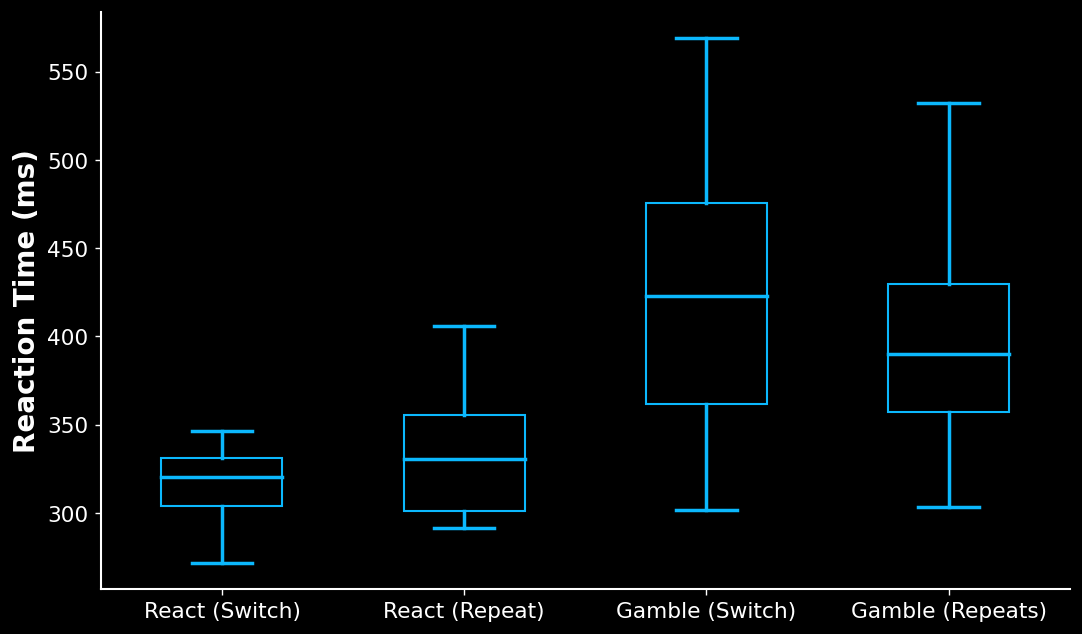

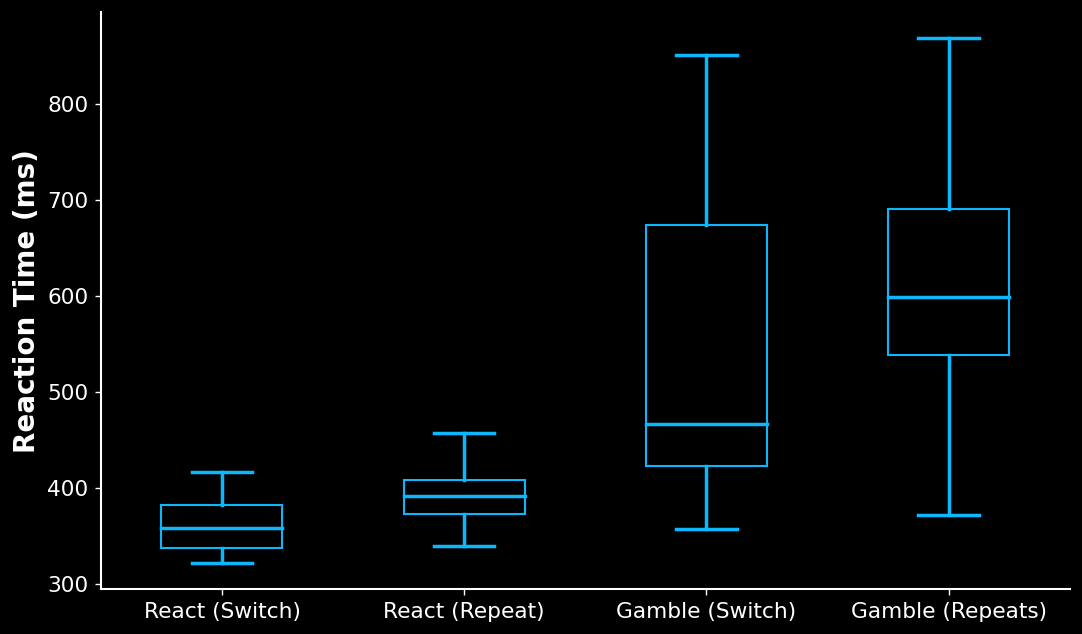

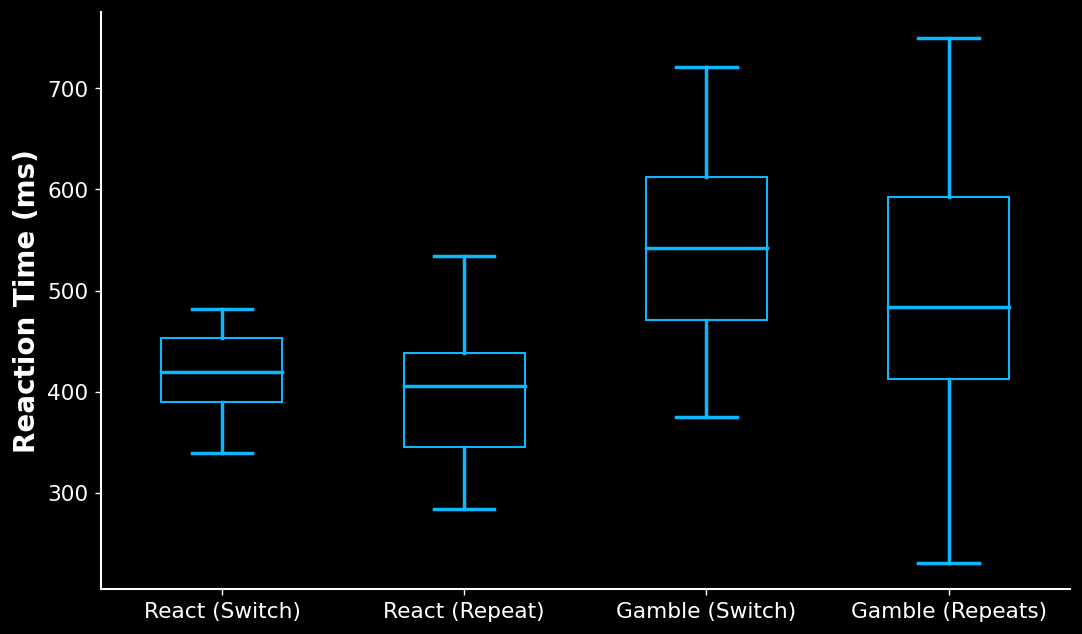

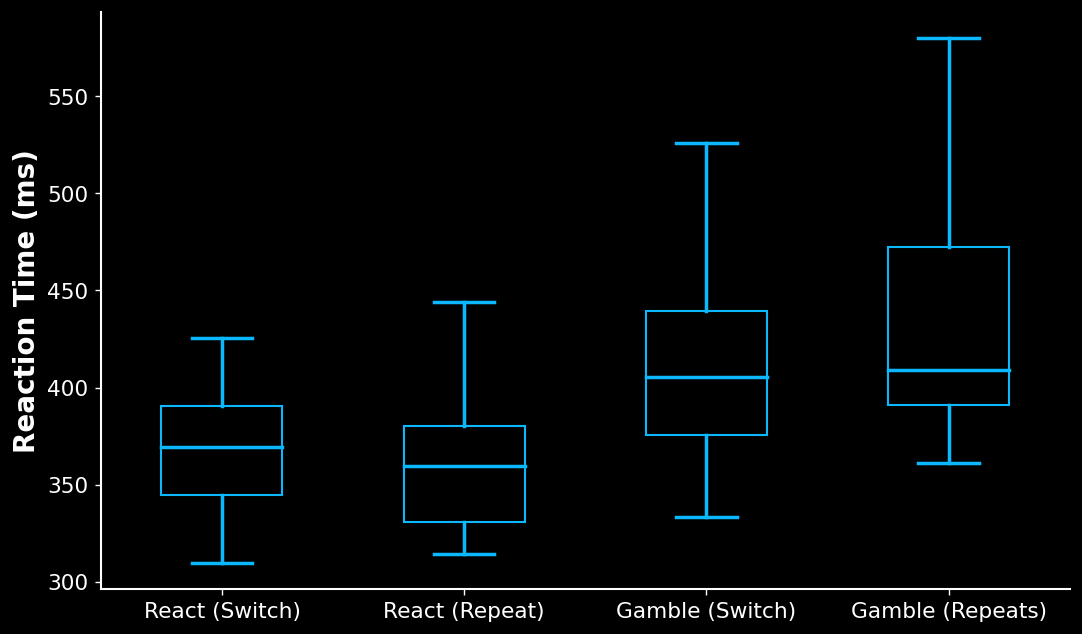

In [21]:
xlocs = np.arange(0,4,1)
for subname in subject.keys():
    fig,ax = plt.subplots(figsize = (10,6))
    metrics = np.vstack((subject[subname].react_reaction_time_repeat,subject[subname].react_reaction_time_switch,subject[subname].gamble_reaction_time_repeat,subject[subname].gamble_reaction_time_switch))
    # dv.boxplot(subject[subname].react_reaction_time_repeat,x_pos = 0,ax=ax)
    # dv.boxplot(subject[subname].react_reaction_time_switch,x_pos = 1,ax=ax)
    # dv.boxplot(subject[subname].gamble_reaction_time_repeat,x_pos = 2,ax=ax)
    # dv.boxplot(subject[subname].gamble_reaction_time_switch,x_pos = 3,ax=ax)
    pf.multi_boxplot(ax,metrics.T,xlocs=xlocs)
    xlabs = ['React (Switch)','React (Repeat)','Gamble (Switch)','Gamble (Repeats)']
    ax.set_xticklabels(xlabs)
    ax.set_ylabel('Reaction Time (ms)')

# Group Boxplots

Median Reaction times

Text(0, 0.5, 'Reaction Time (ms)')

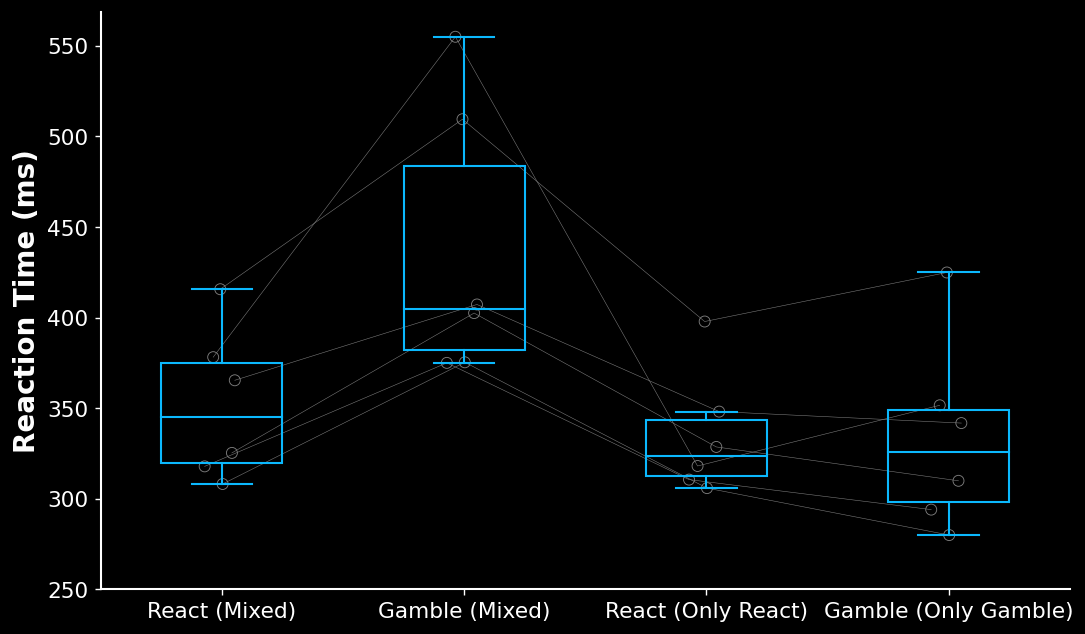

In [53]:
react_mixed = group.combine_all_subjects('react_reaction_time_mixed_median')[:6]
react_only = group.combine_all_subjects('react_reaction_time_only_react_median')[:6]
gamble_mixed = group.combine_all_subjects('gamble_reaction_time_mixed_median')[:6]
gamble_only = group.combine_all_subjects('gamble_reaction_time_only_gamble_median')[:6]
fig,ax = plt.subplots(figsize = (10,6))
dv.boxplot(react_mixed,x_pos = 0,ax=ax)
dv.boxplot(gamble_mixed,x_pos = 1,ax=ax)
dv.boxplot(react_only,x_pos = 2,ax=ax)
dv.boxplot(gamble_only,x_pos = 3,ax=ax)

dv.jitter_array(ax =ax, x_positions = [0,1,2,3],data_list = [react_mixed,gamble_mixed,react_only,gamble_only],circle_size = 40,include_mean=False)

xlabs = ['React (Mixed)','Gamble (Mixed)','React (Only React)','Gamble (Only Gamble)']
ax.set_xticks([0,1,2,3])
ax.set_yticks(np.arange(250,600,50))
ax.set_xticklabels(xlabs)
ax.set_ylabel('Reaction Time (ms)')
# ax.set_ylim(250,450)

Compare Repeat Trials to Switch Trials 